**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Grupo 13 - Entregable - Parte 1 - Ejercicios 2 y 3

Comienza con las transformaciones que traemos del ejercicio previo.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas
import seaborn as sns

pd.set_option('display.max_columns', 500)
sns.set_context('talk')

In [2]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
#Se eliminaron los datos outliers de la variable Price en base a la regla del rango intercuartílico.

q25=melb_df.Price.quantile(.25)
q75=melb_df.Price.quantile(.75)

RI=q75-q25

lim_inferior=q25-1.5*RI
lim_superior=q75+1.5*RI

print("Nuevo mínimo=", lim_inferior)   #como el mínimo es negativo, tomaría el mínimo real de la variable. Es decir, solo restringiríamos la cola derecha de la distribución
print("Nuevo máximo=",lim_superior)

Nuevo mínimo= -370000.0
Nuevo máximo= 2350000.0


In [4]:
melb_df2=melb_df[melb_df.Price<lim_superior]

In [5]:
relevant_columns2=['Rooms', 'Type', 'Price', 'Method',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'SellerG','Suburb', 'CouncilArea']
melb_df3=melb_df2[relevant_columns2]

Abajo se incluyen todas las otras modificaciones que hicimos a las variables, para partir el análisis desde ahí.

In [6]:
auction_price_groups = {
    'S': 'On price',
    'SA': 'On price',
    'PI': 'Under',
    'VB': 'Under',
    'SP': 'Above'
}

auction_price = melb_df3.Method.replace(auction_price_groups)

In [7]:
new_groups = {
    'Eastern Victoria': 'Victoria',
    'Northern Victoria': 'Victoria',
    'Western Victoria': 'Victoria',
    'Southern Metropolitan': 'Southern Metropolitan',
    'Northern Metropolitan': 'Northern Metropolitan',
    'Western Metropolitan': 'Western Metropolitan',
    'Eastern Metropolitan': 'South-Eastern Metropolitan',
    'South-Eastern Metropolitan': 'South-Eastern Metropolitan',
}

grouped_region = melb_df3.Regionname.replace(new_groups)

In [8]:
#Transformar la variable Date en una variable temporal

melb_df3['Date'] = pandas.to_datetime(melb_df3.Date, dayfirst=True)

<ipython-input-8-d07dc58a2532>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df3['Date'] = pandas.to_datetime(melb_df3.Date, dayfirst=True)


In [9]:
#Dado que la precisión por día no será útil, extraer por mes y año 

melb_df3['date_month'] = melb_df3.Date.dt.month
melb_df3['date_year'] = melb_df3.Date.dt.year

<ipython-input-9-66e7499d1105>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df3['date_month'] = melb_df3.Date.dt.month


In [10]:
#Eliminamos el outlier de YearBuilt
melb_df3=melb_df3[melb_df3.YearBuilt!=1196]

Se hace el merge con la info de la base de datos de Airbnb

In [11]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

C:\Users\arrua\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
airbnb_df['zipcode'] = pandas.to_numeric(airbnb_df.zipcode, errors='coerce')

In [13]:
relevant_cols = ['price', 'weekly_price', 'monthly_price', 'zipcode']
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count'], 'weekly_price': ['mean', 'count'],
        'monthly_price': ['mean', 'count']})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count',
             'weekly_price mean': 'airbnb_weekly_price_mean',
             'weekly_price count': 'airbnb_weekly_price_count',
             'monthly_price mean': 'airbnb_monthly_price_mean',
             'monthly_price count': 'airbnb_monthly_price_count'}
)

In [14]:
complete_df= melb_df3.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode'
)
complete_df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12955 entries, 0 to 12954
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Rooms                       12955 non-null  int64         
 1   Type                        12955 non-null  object        
 2   Price                       12955 non-null  float64       
 3   Method                      12955 non-null  object        
 4   Date                        12955 non-null  datetime64[ns]
 5   Distance                    12955 non-null  float64       
 6   Postcode                    12955 non-null  float64       
 7   Bathroom                    12955 non-null  float64       
 8   Car                         12896 non-null  float64       
 9   Landsize                    12955 non-null  float64       
 10  BuildingArea                6765 non-null   float64       
 11  YearBuilt                   7797 non-null   float64   

In [15]:
#Retomamos la eliminación según conteo de casos con información por zipcode para los precios promedio calculados en la base de Airbnb 
complete_df2=complete_df[complete_df.airbnb_record_count>10]

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).


In [16]:
print("NaN de Suburbio=", complete_df2.Suburb.isna().sum())
print("NaN de CouncilArea=", complete_df2.CouncilArea.isna().sum())

NaN de Suburbio= 0
NaN de CouncilArea= 1193


In [17]:
complete_df2.Suburb.describe()    #265 categorías para Suburb

count         12357
unique          265
top       Reservoir
freq            359
Name: Suburb, dtype: object

In [18]:
complete_df2.CouncilArea.describe()    #31 categorías para CouncilArea, con lo cual un CouncilArea abarca a más de un Suburbio

count        11164
unique          31
top       Moreland
freq          1064
Name: CouncilArea, dtype: object

Para la imputación de la variable CouncilArea se decidió emplear un método manual basado en el análisis de los casos para los cuales se tiene información completa sobre las dos variables: Suburb y CouncilArea. 
Este método se basa en la identificación de casos NaN de CouncilArea para Suburbs que se repitan en otras observaciones para las cuales exista dato tanto para Suburb como para CouncilArea.


In [19]:
complete_df2.head(2)

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,SellerG,Suburb,CouncilArea,date_month,date_year,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count
0,2,h,1480000.0,S,2016-12-03,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,Northern Metropolitan,4019.0,Biggin,Abbotsford,Yarra,12,2016,3067.0,130.624031,258.0,605.152174,46.0,2187.032258,31.0
1,2,h,1035000.0,S,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0,Biggin,Abbotsford,Yarra,2,2016,3067.0,130.624031,258.0,605.152174,46.0,2187.032258,31.0


In [20]:
contador=0

for i in complete_df2[complete_df2.CouncilArea.isnull()].Suburb.unique():
    council_area=complete_df2[(complete_df2.Suburb==i) & (~complete_df2.CouncilArea.isnull())].CouncilArea.unique()
    if council_area.size!=0:
        if council_area.size>1:
            contador=contador+1
            print(i," CouncilArea", council_area)
            council_area=council_area[0]
            print("----------------Nos quedamos con el primero----------")
            print(i," CouncilArea:", council_area)
        else:
            council_area=council_area[0]
            print(i," CouncilArea:", council_area)
        
        complete_df2.loc[complete_df2[(complete_df2.Suburb==i) & (complete_df2.CouncilArea.isnull())].index,'CouncilArea']=council_area
        
print("Existen {} suburbs que pertenecen a mas de un CouncilArea".format(contador))

Brighton East  CouncilArea ['Bayside' 'Glen Eira']
----------------Nos quedamos con el primero----------
Brighton East  CouncilArea: Bayside
Reservoir  CouncilArea: Darebin
Aberfeldie  CouncilArea: Moonee Valley
Albion  CouncilArea: Brimbank
Alphington  CouncilArea ['Darebin' 'Yarra']
----------------Nos quedamos con el primero----------
Alphington  CouncilArea: Darebin
Altona  CouncilArea: Hobsons Bay
Altona Meadows  CouncilArea: Hobsons Bay
Altona North  CouncilArea: Hobsons Bay
Armadale  CouncilArea: Stonnington
Ascot Vale  CouncilArea: Moonee Valley
Balaclava  CouncilArea: Port Phillip
Balwyn North  CouncilArea: Boroondara
Bayswater  CouncilArea: Knox
Bentleigh East  CouncilArea: Glen Eira
Berwick  CouncilArea: Casey
Black Rock  CouncilArea: Bayside
Blackburn North  CouncilArea: Whitehorse
Box Hill  CouncilArea: Whitehorse
Briar Hill  CouncilArea: Banyule
Broadmeadows  CouncilArea: Hume
Brunswick  CouncilArea: Moreland
Brunswick East  CouncilArea: Moreland
Bundoora  CouncilArea ['B

C:\Users\arrua\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Frankston South  CouncilArea: Frankston
Gladstone Park  CouncilArea: Hume
Glen Iris  CouncilArea ['Boroondara' 'Stonnington']
----------------Nos quedamos con el primero----------
Glen Iris  CouncilArea: Boroondara
Glen Waverley  CouncilArea: Monash
Glenroy  CouncilArea: Moreland
Gowanbrae  CouncilArea: Moreland
Greensborough  CouncilArea ['Banyule' 'Nillumbik']
----------------Nos quedamos con el primero----------
Greensborough  CouncilArea: Banyule
Greenvale  CouncilArea: Hume
Hampton  CouncilArea ['Bayside' 'Unavailable']
----------------Nos quedamos con el primero----------
Hampton  CouncilArea: Bayside
Highett  CouncilArea ['Bayside' 'Kingston']
----------------Nos quedamos con el primero----------
Highett  CouncilArea: Bayside
Hoppers Crossing  CouncilArea: Wyndham
Huntingdale  CouncilArea: Monash
Kealba  CouncilArea: Brimbank
Keilor East  CouncilArea ['Moonee Valley' 'Brimbank']
----------------Nos quedamos con el primero----------
Keilor East  CouncilArea: Moonee Valley
Kew  Co

In [21]:
complete_df2[(complete_df2.CouncilArea.isnull())]

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,SellerG,Suburb,CouncilArea,date_month,date_year,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count
11704,3,h,657500.0,SP,2017-09-03,14.8,3023.0,2.0,2.0,631.0,NaN,NaN,-37.75225,144.75520,Western Metropolitan,1607.0,Harcourts,Burnside,NaN,9,2017,3023.0,92.600000,35.0,500.0,1.0,NaN,0.0
11885,3,h,640000.0,SP,2017-09-09,16.5,3049.0,2.0,2.0,607.0,NaN,NaN,-37.67379,144.89826,Northern Metropolitan,1130.0,YPA,Attwood,NaN,9,2017,3049.0,92.285714,21.0,400.0,1.0,NaN,0.0
12768,3,h,580000.0,S,2017-08-26,14.8,3023.0,2.0,2.0,461.0,174.0,2000.0,-37.74518,144.74708,Western Metropolitan,1607.0,YPA,Burnside,NaN,8,2017,3023.0,92.600000,35.0,500.0,1.0,NaN,0.0


Finalmente, se decidió eliminar la variable `CouncilArea` ya que observamos que luego de la imputación seguían apareciendo valores nulos para ciertos casos. Además, consideramos que la variable `Suburb` nos brinda información más detallada de la ubicación de las propiedades que `CouncilArea`.

In [22]:
#Eliminación de la variable CouncilArea 
complete_df2.drop(['CouncilArea'],axis=1,inplace=True)

C:\Users\arrua\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


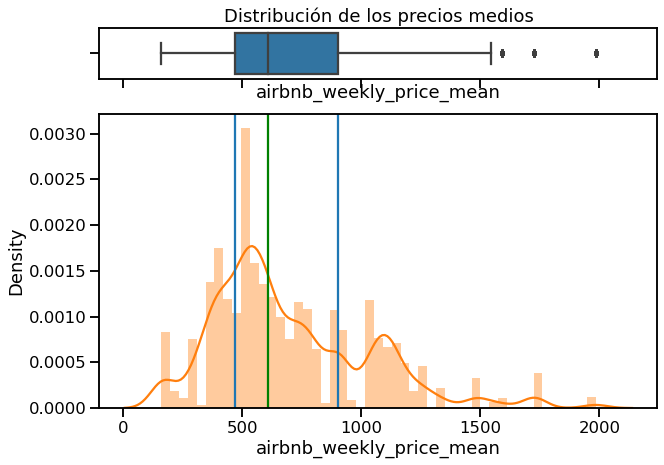

In [23]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(complete_df2.airbnb_weekly_price_mean, ax=ax_box)
sns.distplot(complete_df2.airbnb_weekly_price_mean, ax=ax_hist, kde=False, hist=False)
sns.distplot(complete_df2.airbnb_weekly_price_mean, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(complete_df2.airbnb_weekly_price_mean.quantile(0.25))
plt.axvline(complete_df2.airbnb_weekly_price_mean.quantile(0.50),color='g')
plt.axvline(complete_df2.airbnb_weekly_price_mean.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Distribución de los precios medios")
plt.show()


C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


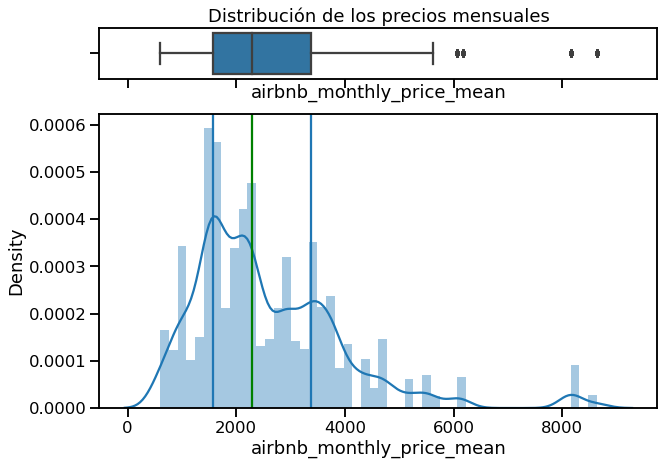

In [24]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(complete_df2.airbnb_monthly_price_mean, ax=ax_box)
sns.distplot(complete_df2.airbnb_monthly_price_mean, ax=ax_hist, kde=False, hist=False,color='b')
sns.distplot(complete_df2.airbnb_monthly_price_mean, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(complete_df2.airbnb_monthly_price_mean.quantile(0.25))
plt.axvline(complete_df2.airbnb_monthly_price_mean.quantile(0.50),color='g')
plt.axvline(complete_df2.airbnb_monthly_price_mean.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Distribución de los precios mensuales")
plt.show()

<AxesSubplot:>

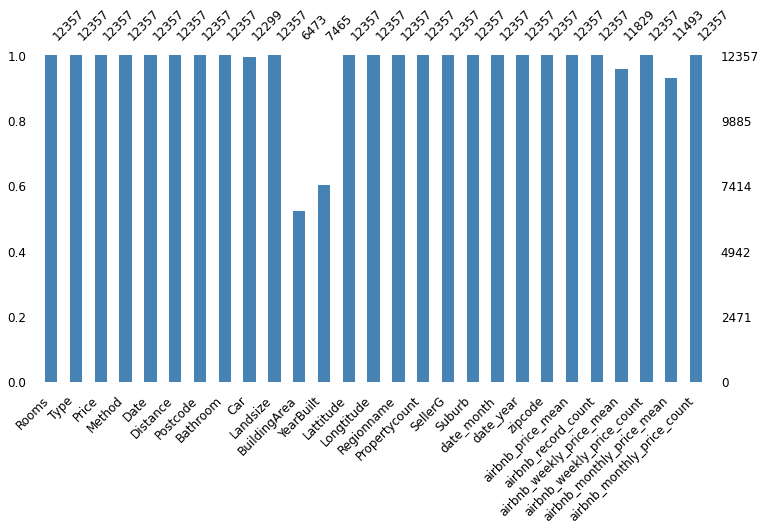

In [25]:
import missingno as msno
msno.bar(complete_df2,figsize=(12, 6), fontsize=12, color='steelblue')   

Una vez eliminadas aquellos zipcodes que tienen menos de 10 observaciones para el cálculo del precio promedio de Airbnb, no nos quedan datos faltantes para la variable precios promedio. Por tanto, vamos a trabajar las imputaciones sobre las otras variables de precio promedio: precio promedio mensual y precio promedio semanal.

<AxesSubplot:>

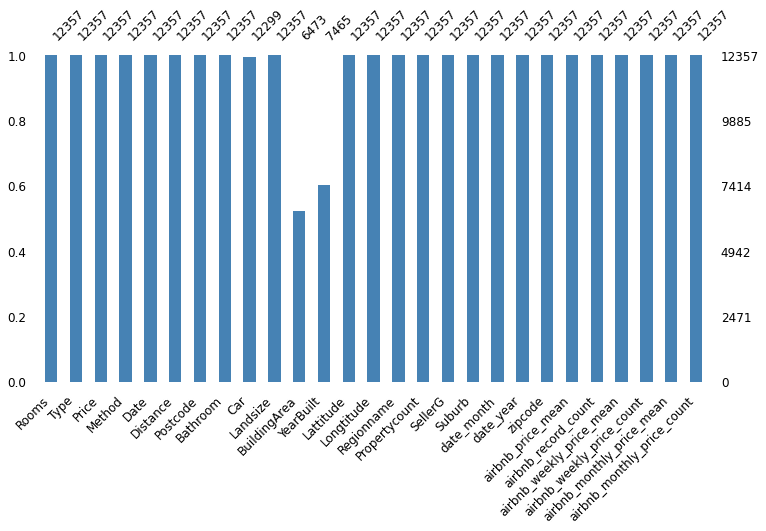

In [28]:
#1) Imputación por la media
from sklearn.impute import SimpleImputer
complete_df_mean = complete_df2.copy()

#setting strategy to 'mean' 
mean_imputer = SimpleImputer(missing_values=np.nan,strategy='mean') # strategy can also be mean or median or mean

complete_df_mean[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]] = mean_imputer.fit_transform(complete_df_mean[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]])
msno.bar(complete_df_mean,figsize=(12, 6), fontsize=12, color='steelblue')

<AxesSubplot:>

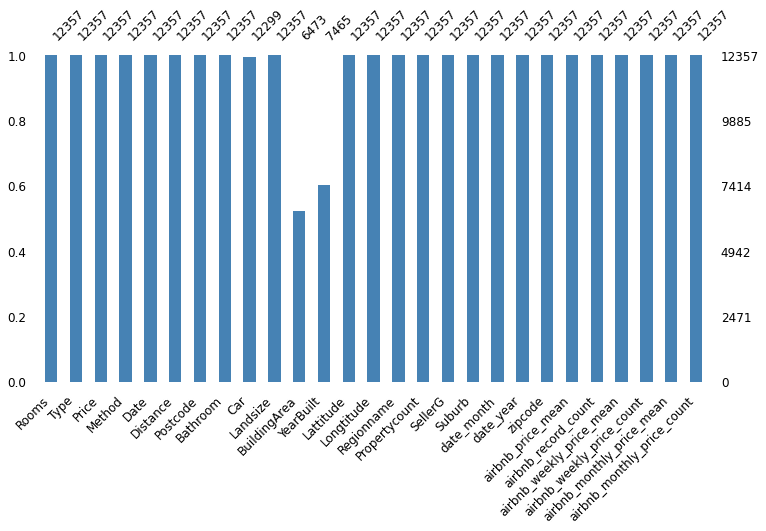

In [28]:
#2) KNN 

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
complete_df_knn = complete_df2.copy(deep=True)

complete_df_knn[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]]=scaler.fit_transform(complete_df_knn[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]])

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

complete_df_knn[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]] = knn_imputer.fit_transform(complete_df_knn[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]])
msno.bar(complete_df_knn,figsize=(12, 6), fontsize=12, color='steelblue')

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


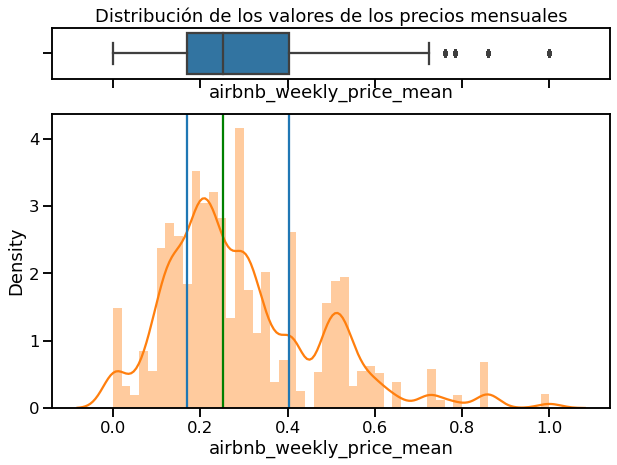

In [29]:
#COMENTARIO FC: Este gráfico tampoco me queda claro por qué acá. Comnetario Lau, imagino que la idea es ver la distribución luego de la imputación, de todas maneras debería estar el de la otra variable a imputar
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(complete_df_knn.airbnb_weekly_price_mean, ax=ax_box)
sns.distplot(complete_df_knn.airbnb_weekly_price_mean, ax=ax_hist, kde=False, hist=False)
sns.distplot(complete_df_knn.airbnb_weekly_price_mean, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(complete_df_knn.airbnb_weekly_price_mean.quantile(0.25))
plt.axvline(complete_df_knn.airbnb_weekly_price_mean.quantile(0.50),color='g')
plt.axvline(complete_df_knn.airbnb_weekly_price_mean.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Distribución de los valores de los precios mensuales")
plt.show()

<AxesSubplot:>

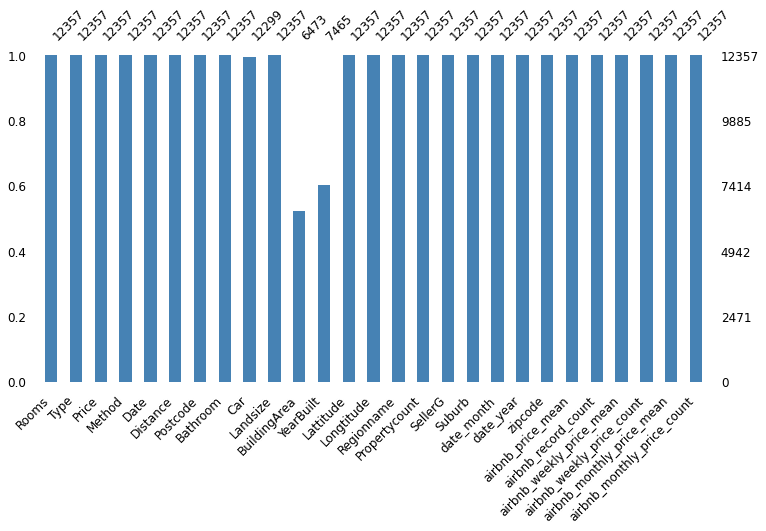

In [30]:
#3) Multivariate Feature Imputation   
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

complete_df_mice = complete_df2.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=BayesianRidge())

complete_df_mice[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]] = mice_imputer.fit_transform(complete_df_mice[["airbnb_weekly_price_mean","airbnb_monthly_price_mean"]])
msno.bar(complete_df_mice,figsize=(12, 6), fontsize=12, color='steelblue')


Se realizaron imputaciones de las variables precios promedio mensual y promedio semanal por medio de tres métodos de imputación: i) por la media, ii) KNN, iii) Multivariate Feature Imputation.
La evaluación del mejor método de imputación se haría con el posterior análisis de las métricas elegidas del modelo de análisis supervisado. No existe una metodología de imputación ideal, sino que hay que hacer un estudio para ver cual es la que mejor se ajusta al conjunto de datos utilizado.
En este caso, se decidió utilizar el método KNN Imputer. Fue necesario escalar los datos previo a la imputación, ya que KNN emplea la distancia euclídea entre las observaciones para predecir el valor faltante. Para esto se eligió el método MinMaxScaler (escalamiento entre 0 y 1) que es el más adecuado para este tipo de imputación.

## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [31]:
#Elegir el data set con las mejores reglas de imputación para todas las variables y renombrarlo: df_final
df_final=complete_df_knn

df_final.to_csv("melbourne_houses_final_df.csv", index=False)

In [33]:
# from google.colab import files
# files.download("melbourne_houses_final_df.csv")